In [1]:
# Import all the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
color_code = ['#2f312d', '#e73a8c']

In [3]:
# Boston datasets

listings_boston = pd.read_csv("./airbnb_boston/listings.csv")
calendar_boston = pd.read_csv("./airbnb_boston/calendar.csv")
reviews_boston = pd.read_csv("./airbnb_boston/reviews.csv")

# Seattle datasets

listings_seattle = pd.read_csv("./airbnb_seattle/listings.csv")
calendar_seattle = pd.read_csv("./airbnb_seattle/calendar.csv")
reviews_seattle = pd.read_csv("./airbnb_seattle/reviews.csv")

# Set option to show all columns while using head
pd.set_option("display.max_columns", None)

In [4]:
# Show the list of columns with more than 90% missing values

boston_90perc_missing = list(listings_boston.columns[listings_boston.isnull().mean() > 0.90])
seattle_90perc_missing = list(listings_seattle.columns[listings_seattle.isnull().mean() > .90])

print("Boston Listings data and the list of the following columns with more than 90% missing values: {}".format(boston_90perc_missing)) 
print(" ")
print("Seattle Listings data and the list of the following columns with more than 90% missing values: {}".format(seattle_90perc_missing))

Boston Listings data and the list of the following columns with more than 90% missing values: ['neighbourhood_group_cleansed', 'square_feet', 'has_availability', 'license', 'jurisdiction_names']
 
Seattle Listings data and the list of the following columns with more than 90% missing values: ['square_feet', 'license']


In [5]:
all_dfs = [listings_boston, calendar_boston, reviews_boston, listings_seattle, calendar_seattle, reviews_seattle]
all_dfs_name = ['listings_boston', 'calendar_boston', 'reviews_boston', 'listings_seattle', 'calendar_seattle', 'reviews_seattle']

for i in range(0,6):
    print("The shape of "+str(all_dfs_name[i])+" is: " +str(all_dfs[i].shape))

The shape of listings_boston is: (3585, 95)
The shape of calendar_boston is: (1308890, 4)
The shape of reviews_boston is: (68275, 6)
The shape of listings_seattle is: (3818, 92)
The shape of calendar_seattle is: (1393570, 4)
The shape of reviews_seattle is: (84849, 6)


## Questions to answer from the data
* Which category of property type tend to be at a pricier end?
* Is there a relationship between the prices and the region where the property is located?
* Which times are the best to book? _(use calendar_boston, calendar_seattle)_
* Do the quantity of reviews get affected by the prices?

In [6]:
# Uncomment the required table to look at the first few rows

listings_boston.head(5)
# calendar_boston.head(5)
# reviews_boston.head(5)
# listings_seattle.head(5)
# calendar_seattle.head(5)
# reviews_seattle.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [7]:
# Selecting some of the columns which would help answer some of the listed questions above

listings_boston_subset = listings_boston[['id', 'house_rules', 'host_since', 'last_scraped', 'host_neighbourhood', 'host_location','host_response_rate', 'host_response_time', 'host_acceptance_rate', 'host_is_superhost', 'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'number_of_reviews', 'review_scores_rating', 'accommodates']]
listings_boston_subset['Category'] = 'Boston'

listings_seattle_subset = listings_seattle[['id', 'host_since', 'last_scraped', 'host_location', 'host_neighbourhood', 'host_response_rate', 'host_response_time', 'host_acceptance_rate', 'host_is_superhost', 'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'number_of_reviews', 'review_scores_rating', 'accommodates']]
listings_seattle_subset['Category'] = 'Seattle'

listings_combined = listings_boston_subset.append(listings_seattle_subset) #pd.concat([listings_boston_subset, listings_seattle_subset])

listings_combined.head(1)

,id,house_rules,host_since,last_scraped,host_neighbourhood,host_location,host_response_rate,host_response_time,host_acceptance_rate,host_is_superhost,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,accommodates,Category
0,12147973,Clean up and treat the home the way you'd like...,2015-04-15,2016-09-07,Roslindale,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,42.282619,-71.133068,House,Entire home/apt,1.5,2.0,3.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,0,NaN,4,Boston


In [8]:
cols = ['host_response_rate', 'host_acceptance_rate', 'price']
for col in cols:
    listings_combined[col] = listings_combined[col].str.extract(r'(\d+)')
    listings_combined[col] = listings_combined[col].astype('float')

In [9]:
missing_values = (listings_combined.isna().sum() * 100 / listings_combined.shape[0]).sort_values(ascending=False)
missing_values[missing_values > 0]
# plt.figure(figsize = (10,10))
# sns.barplot(missing_values.index, missing_values.values)
# plt.xticks(rotation = 'vertical')
# plt.show()

house_rules             67.675267
review_scores_rating    19.721734
host_acceptance_rate    16.803998
host_response_time      13.426989
host_response_rate      13.426989
host_neighbourhood       8.631636
bathrooms                0.405241
host_location            0.256653
bedrooms                 0.216129
beds                     0.135080
property_type            0.054032
host_since               0.027016
host_is_superhost        0.027016
dtype: float64

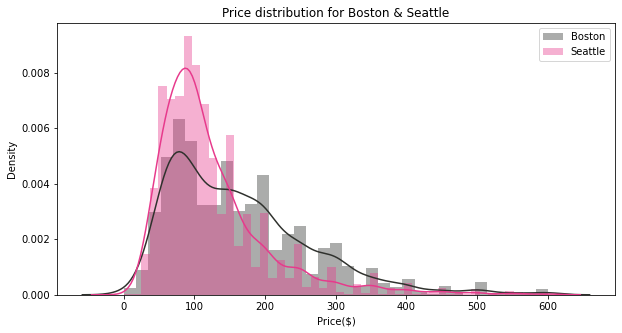

In [42]:
plt.figure(figsize = (10,5))
sns.distplot(listings_combined.price.loc[(listings_combined['price'] <= 600) & (listings_combined['Category'] == 'Boston')], kde = True, color = '#2f312d', label = 'Boston')
sns.distplot(listings_combined.price.loc[(listings_combined['price'] <= 600) & (listings_combined['Category'] =='Seattle')], kde = True, color = '#e73a8c', label = 'Seattle')
plt.title('Price distribution for Boston & Seattle')
plt.xlabel("Price($)")
plt.ylabel("Density")
plt.legend()
plt.show()

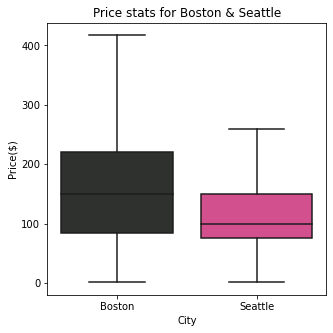

In [43]:
plt.figure(figsize = (5,5))
sns.set_palette(sns.color_palette(color_code))
sns.boxplot(x=listings_combined.Category, y =listings_combined.price, data = listings_combined, showfliers = False)
# sns.boxplot(listings_seattle_subset.price)
plt.title('Price stats for Boston & Seattle')
plt.xlabel("City")
plt.ylabel("Price($)")
plt.show()

### Which category of property type tend to be at a pricier end?

When it comes to booking for a stay, there are multiple factors that consumers consider like listing reviews, location, price and various other factors.

We consider the listings data for Boston and Seattle to check out the price variation across the various property types to understand the cheapest and the most expensive

#### Insights for Boston
* The average prices of Guesthouse(\\$289), Boat(\\$268) and Other(\\$229) are the most expensive in the city of Boston
* The least expensive property types include that of Camper/RV (\\$60), Dorm (\\$62.5) and Entire Floor (\\$122)

**_While Guesthouse is the most expensive property in the city, Camper/RV is the cheapest of all._** Given the mid-point of the average price ranges, Apartments seem to be the most optimal choice with an average price of \\$175

#### Insights for Seattle
* The most expensive property types in Seattle (in terms of average prices) are Boat(\\$282), Condominium(\\$151) and Loft(\\$135)
* The cheapest property types include Dorm(\\$39.5), Tent(\\$54) and Other(\\$94.6)

**_To sum it up, Boats at a higher end when it comes to prices while Dorms are the cheapest options for stay in the city of Seattle_**. The optimal options for stay in terms of prices are Bed & Breakfast and Bungalow with average prices at \\$112 and \\$115 respectively.

In [93]:
# Check the average tables for prices: host_neighbourhood and property type

# listings_filtered_seattle.groupby(['host_neighbourhood']).mean(['price']).sort_values(['price'])

Text(3.674999999999997, 0.5, 'Number of reviews')

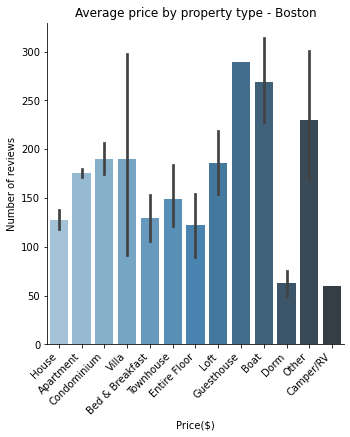

In [74]:
listings_filtered_boston = listings_combined.loc[listings_combined['Category'].isin(['Boston'])]

catplot_boston=sns.catplot(x='property_type', y='price', kind='bar', data=listings_filtered_boston, palette='Blues_d')
catplot_boston.set_xticklabels(rotation=45, horizontalalignment='right').set_axis_labels('Property Type', 'Price($)')
plt.title('Average price by property type - Boston')
plt.xlabel("Property Type")
plt.ylabel("Average Price ($)")

Text(3.674999999999997, 0.5, 'Average Price ($)')

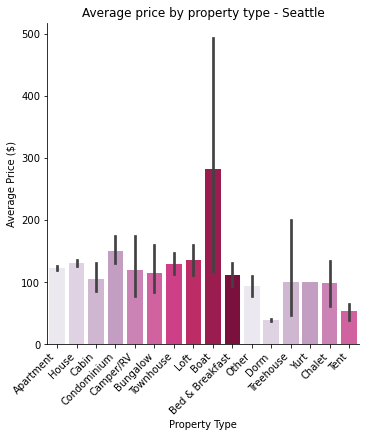

In [76]:
listings_filtered_seattle = listings_combined.loc[listings_combined['Category'].isin(['Seattle'])]
sequential_colors = sns.color_palette("PuRd", 10)

catplot_seattle=sns.catplot(x='property_type', y='price', kind='bar', data=listings_filtered_seattle, palette=sequential_colors)
catplot_seattle.set_xticklabels(rotation=45, horizontalalignment='right')
plt.title('Average price by property type - Seattle')
plt.xlabel("Property Type")
plt.ylabel("Average Price ($)")

In [52]:
# def find_max_min(df, col):
#     max_val = df[col].max()
#     min_val = df[col].min()
#     return (max_val, min_val)

# print(find_max_min(listings_filtered_boston, 'latitude'))
# print(find_max_min(listings_filtered_boston, 'longitude'))

### Is there a relationship between the prices and the neighbourhood where the property is located?

Another factor to consider while considering a place to stay for the vacation are the property location. There might be numerous factors coming into play when it comes to the price of the property.

Region of the listing is an important factor that affects the price, based on the availabilty of amenities nearby, accessibility to transport and many others. Considering the price, we want to look at the comparison of the same across neighbourhoods in Boston and Seattle.

From the boxplots, here are some of the insights that can be inferred

#### Boston
* Bernal Heights, Sunnyvale and Chelsea have some of the most expensive listings, in the city of Boston with the median price being more than \\$300 on an average
* East Harlem, Chestnut Hill and Mattapan are the cheapest neighbourhoods in terms of Airbnb property listings with the median price being approximately \\$65

#### Seattle
* Kaanapali, Beverly Hills and Kauaʻi are some of the neighbourhoods with the most expensive Airbnb listings with the prices being more than \\$350
* Santa Monica, Roxhill and South Beacon Hill are the cheapest listings in the city of Seattle with the median prices approximately \\$60

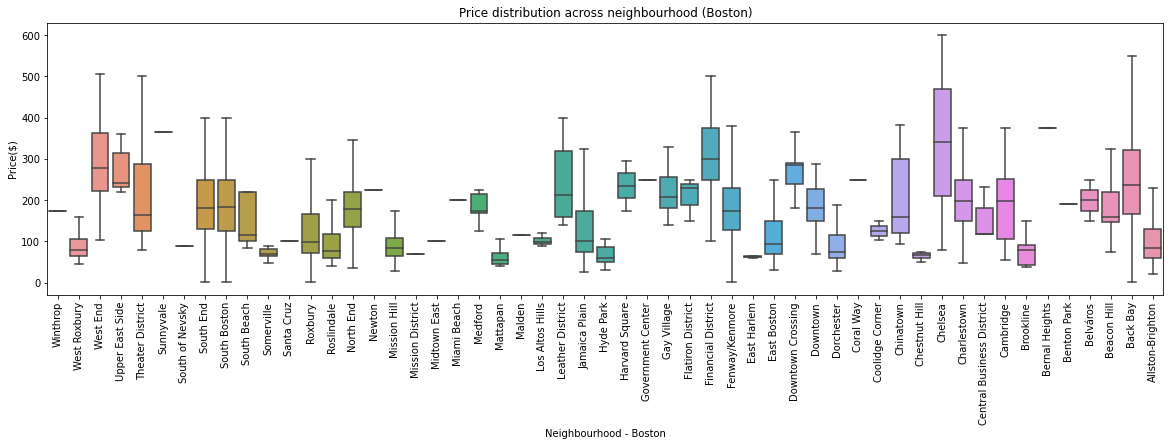

In [48]:
order_by_price = listings_filtered_boston.groupby(by=["host_neighbourhood"])["price"].median().iloc[::-1].index

plt.figure(figsize = (20,5))
neighbourhood_boxplot = sns.boxplot(x=listings_filtered_boston.host_neighbourhood, y = listings_filtered_boston.price, data = listings_filtered_boston, showfliers = False, order = order_by_price)
neighbourhood_boxplot.set_xticklabels(neighbourhood_boxplot.get_xticklabels(),rotation='vertical')
plt.title('Price distribution across neighbourhood (Boston)')
plt.xlabel("Neighbourhood - Boston")
plt.ylabel("Price($)")
plt.show()

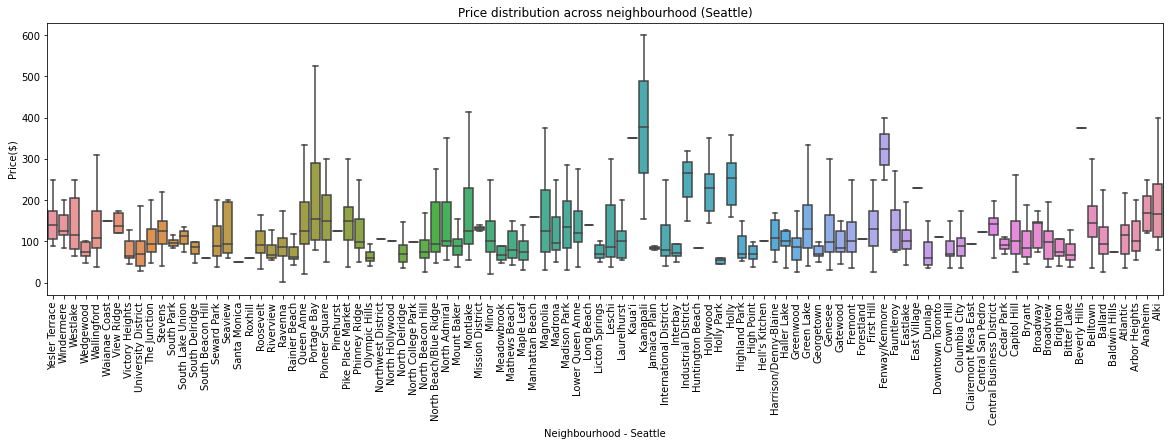

In [47]:
order_by_price = listings_filtered_seattle.groupby(by=["host_neighbourhood"])["price"].median().iloc[::-1].index

plt.figure(figsize = (20,5))
neighbourhood_boxplot = sns.boxplot(x=listings_filtered_seattle.host_neighbourhood, y = listings_filtered_seattle.price, data = listings_filtered_seattle, showfliers = False, order = order_by_price)
neighbourhood_boxplot.set_xticklabels(neighbourhood_boxplot.get_xticklabels(),rotation='vertical')
plt.title('Price distribution across neighbourhood (Seattle)')
plt.xlabel("Neighbourhood - Seattle")
plt.ylabel("Price($)")
plt.show()

### Which times are the best to book?

In [94]:
calendar_boston.head(2)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN


In [137]:
boston_daily = calendar_boston[calendar_boston.available == 'f'].groupby(by = ['date'], as_index = False)['listing_id'].nunique()
boston_daily['date'] = pd.to_datetime(boston_daily['date'])
boston_daily.date

0     2016-09-06
1     2016-09-07
2     2016-09-08
3     2016-09-09
4     2016-09-10
         ...    
360   2017-09-01
361   2017-09-02
362   2017-09-03
363   2017-09-04
364   2017-09-05
Name: date, Length: 365, dtype: datetime64[ns]

<AxesSubplot:xlabel='date', ylabel='listing_id'>

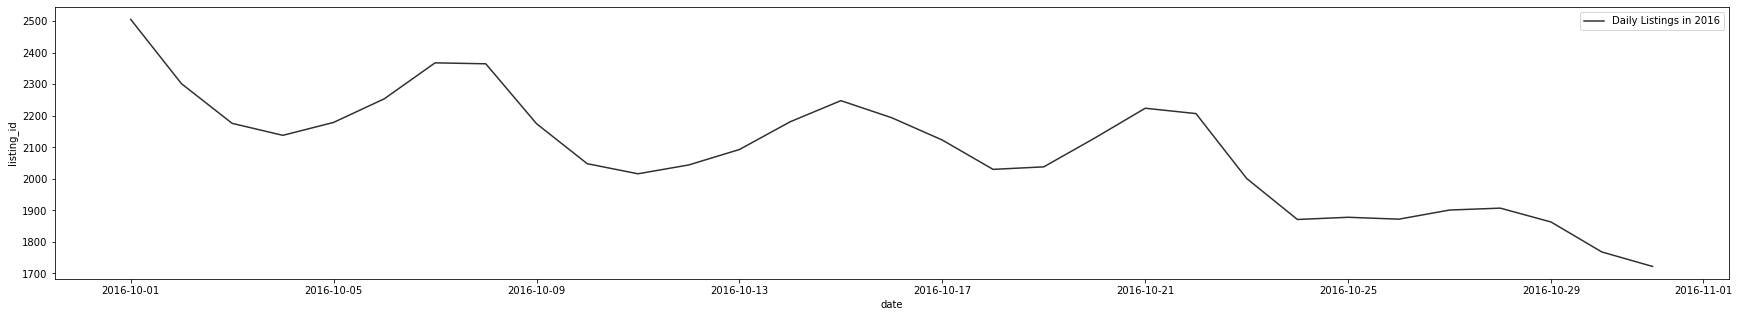

In [147]:
cat_2016 = boston_daily[(boston_daily['date'].dt.year == 2016) & (boston_daily['date'].dt.month == 10)]
cat_2017 =boston_daily[boston_daily['date'].dt.year == 2017]

plt.figure(figsize = (30,5))
sns.lineplot(x = 'date',
             y = 'listing_id',
             data = cat_2016,
             label = 'Daily Listings in 2016')

# # plot using rolling average
# sns.lineplot(x = 'date',
#              y = 'listing_id',
#              data = cat_2017,
#              label = 'Daily Listings in 2017')

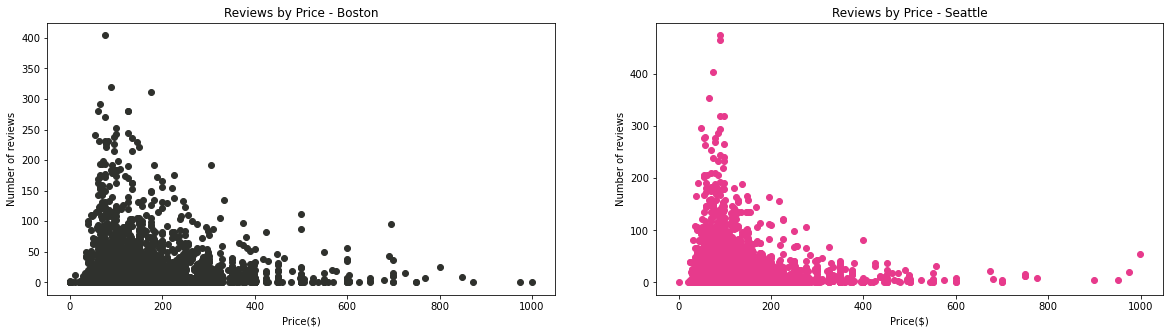

In [36]:
scatter_boston = listings_filtered_boston[['number_of_reviews', 'price']].sort_values(by = 'price')
scatter_seattle = listings_filtered_seattle[['number_of_reviews', 'price']].sort_values(by = 'price')

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.scatter(scatter_boston['price'], scatter_boston['number_of_reviews'], color = '#2f312d')
plt.title('Reviews by Price - Boston')
plt.xlabel("Price($)")
plt.ylabel("Number of reviews")
plt.subplot(1,2,2)
plt.scatter(scatter_seattle['price'], scatter_seattle['number_of_reviews'], color = '#e73a8c')
# plot(x = 'price', y = 'number_of_reviews', style = 'o', figsize =(6,4), legend = False, title = 'Reviews based on Price - Seattle')
plt.title('Reviews by Price - Seattle')
plt.xlabel("Price($)")
plt.ylabel("Number of reviews")
plt.show()

In [379]:
listings_filtered_boston.loc[listings_filtered_boston['host_neighbourhood'].isin(['Chelsea'])]

,id,house_rules,host_since,last_scraped,host_neighbourhood,host_location,host_response_rate,host_response_time,host_acceptance_rate,host_is_superhost,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,accommodates,Category
1890,14035936,- Exclusive penthouse suite over 3 floors - Pl...,2013-08-21,2016-09-07,Chelsea,"Boston, Massachusetts, United States",100.0,within an hour,93.0,f,42.358410,-71.068228,Condominium,Entire home/apt,2.0,2.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",600.0,2,100.0,4,Boston
3463,11343048,NaN,2015-08-19,2016-09-07,Chelsea,"Boston, Massachusetts, United States",100.0,within an hour,96.0,f,42.354819,-71.125992,Apartment,Entire home/apt,1.0,1.0,5.0,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",80.0,11,84.0,5,Boston


In [336]:
calendar_boston[calendar_boston['available'] == 't']

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00
...,...,...,...,...
1308875,14504422,2016-09-20,t,$62.00
1308876,14504422,2016-09-19,t,$62.00
1308877,14504422,2016-09-18,t,$62.00
1308878,14504422,2016-09-17,t,$62.00
